In [341]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold,cross_val_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [343]:
Dataset = pd.read_csv("Telco Customer Churn.csv")
Dataset.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [345]:
Dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [347]:
Dataset.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [349]:
Dataset.shape

(7043, 21)

In [351]:
Features = ["gender","Partner","Dependents","PhoneService","MultipleLines","InternetService","OnlineSecurity","OnlineBackup","DeviceProtection",
           "TechSupport","StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod",]
Features2 = ["SeniorCitizen","MonthlyCharges","TotalCharges"]

In [353]:
X = Dataset.drop(["customerID","Churn"],axis = 1)
y = Dataset["Churn"]

In [355]:
X[Features2] = X[Features2].apply(pd.to_numeric,errors = 'coerce')

In [357]:
Categorical = X[Features]
df = pd.get_dummies(Categorical)
df.shape

(7043, 41)

In [359]:
X = pd.concat([df,X.drop(Categorical,axis = 1)],axis =1 )

In [361]:
X.shape

(7043, 45)

In [363]:
# Missing Values in 44 column
X.iloc[:,-1] = X.iloc[:,-1].fillna(X.iloc[:,-1].mean())

In [365]:
X.isnull().sum()

gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No                            0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No                        0
DeviceProtection_No internet service       0
DeviceProt

In [367]:
Encoder = LabelEncoder()
y = pd.DataFrame(Encoder.fit_transform(y))
y.head()

,0
0,0
1,0
2,1
3,0
4,1


# Scalling

In [229]:
Scaler = StandardScaler()
X = Scaler.fit_transform(X)

# Distribution of Churn

0
0    5174
1    1869
Name: count, dtype: int64


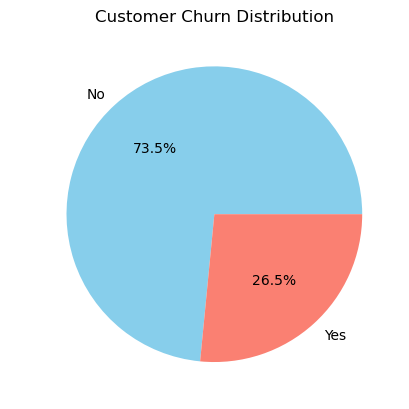

In [232]:
churn_count = y.value_counts()
print(churn_count)
churn_count.plot.pie(
    autopct = '%1.1f%%',
    labels = ["No","Yes"],
    colors = ['skyblue','salmon']
)
plt.title("Customer Churn Distribution")
plt.ylabel(" ")
plt.show()

# Model Building Without PCA

#### Logistic Regression

In [244]:
LR = LogisticRegression()
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
scores = cross_val_score(LR,X,np.array(y[0]),cv = kf, scoring = "accuracy")
print("Score for each Fold: ",scores)
print("Average Scores: ",np.mean(scores)*100)

Score for each Fold:  [0.82044003 0.80908446 0.80198722 0.79261364 0.81036932]
Average Scores:  80.68989329956771


### Support Vector Regression

In [248]:
svm = SVC(kernel = "rbf")
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
scores = cross_val_score(svm,X,np.array(y[0]),cv = kf, scoring = "accuracy")
print("Score for each Fold: ",scores)
print("Average Scores: ",np.mean(scores)*100)

Score for each Fold:  [0.81192335 0.79985806 0.78850248 0.78551136 0.80823864]
Average Scores:  79.8806777856636


### Random forest

In [252]:
rfc = RandomForestClassifier()
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
scores = cross_val_score(rfc,X,np.array(y[0]),cv = kf, scoring = "accuracy")
print("Score for each Fold: ",scores)
print("Average Scores: ",np.mean(scores)*100)

Score for each Fold:  [0.79347055 0.79843861 0.77998581 0.78338068 0.78551136]
Average Scores:  78.81574012839539


# perform PCA

In [255]:
pca = PCA()
pca.fit_transform(X)

array([[-1.99961504e+00, -3.07015208e+00,  4.54431401e+00, ...,
        -2.02187269e-15,  9.16087532e-16, -2.40355352e-15],
       [-3.32762113e-01, -1.20743066e+00,  1.83487951e+00, ...,
         9.01028585e-15,  3.24189723e-15, -1.46910934e-14],
       [-8.64563761e-01, -2.90484280e+00,  1.08949801e+00, ...,
        -2.65478928e-15, -2.55279381e-17,  8.15267668e-15],
       ...,
       [-1.66123253e+00, -2.31944140e+00,  5.45700536e+00, ...,
        -2.18147631e-15,  7.73388213e-16,  1.62285953e-15],
       [-1.97402463e+00, -2.71847341e+00, -1.36896701e+00, ...,
        -3.07462460e-16, -1.07180643e-15,  3.25729010e-15],
       [-1.84377208e+00,  3.15487536e+00, -9.25099126e-01, ...,
         2.44239832e-15,  3.71929399e-16, -2.94825063e-15]])

In [257]:
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

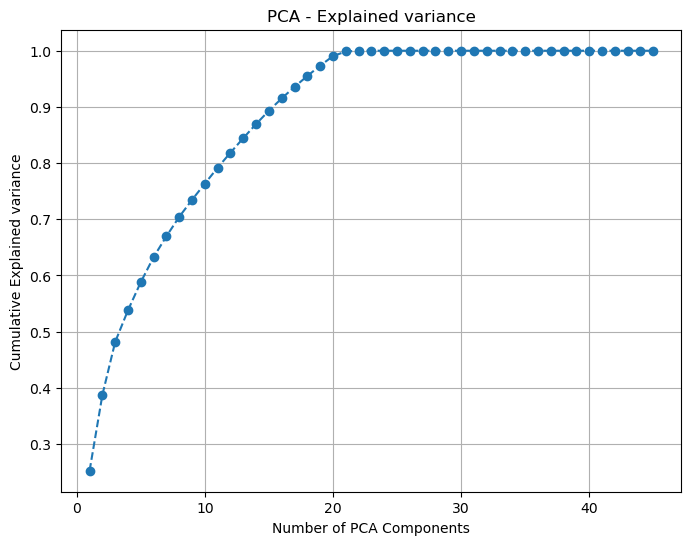

In [261]:
plt.figure(figsize = (8,6))
plt.plot(range(1,len(cumulative_variance)+1),cumulative_variance,marker = 'o',linestyle = '--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained variance")
plt.title("PCA - Explained variance")
plt.grid(True)
plt.show()

In [265]:
n_comp = np.argmax(cumulative_variance >= 0.95)+1
print("Number of Component that Captures 95 percent variance is ", n_comp)

Number of Component that Captures 95 percent variance is  18


In [277]:
pca = PCA(n_components = n_comp)
X_pca = pca.fit_transform(X)

In [279]:
X_pca.shape

(7043, 18)

# Model Building After PCA

### Logistic Regression

In [283]:
LR = LogisticRegression()
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
scores = cross_val_score(LR,X_pca,np.array(y[0]),cv = kf, scoring = "accuracy")
print("Score for each Fold: ",scores)
print("Average Scores: ",np.mean(scores)*100)

Score for each Fold:  [0.8105039  0.79914833 0.79276082 0.78551136 0.79900568]
Average Scores:  79.73860208723143


### SVC

In [286]:
svm = SVC(kernel = "rbf")
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
scores = cross_val_score(svm,X_pca,np.array(y[0]),cv = kf, scoring = "accuracy")
print("Score for each Fold: ",scores)
print("Average Scores: ",np.mean(scores)*100)

Score for each Fold:  [0.80198722 0.7920511  0.78211498 0.77911932 0.79758523]
Average Scores:  79.05715691334926


### RFC

In [289]:
rfc = RandomForestClassifier()
kf = KFold(n_splits = 5,shuffle = True, random_state = 42)
scores = cross_val_score(rfc,X_pca,np.array(y[0]),cv = kf, scoring = "accuracy")
print("Score for each Fold: ",scores)
print("Average Scores: ",np.mean(scores)*100)

Score for each Fold:  [0.77998581 0.76508162 0.76082328 0.75497159 0.76775568]
Average Scores:  76.57235950706497


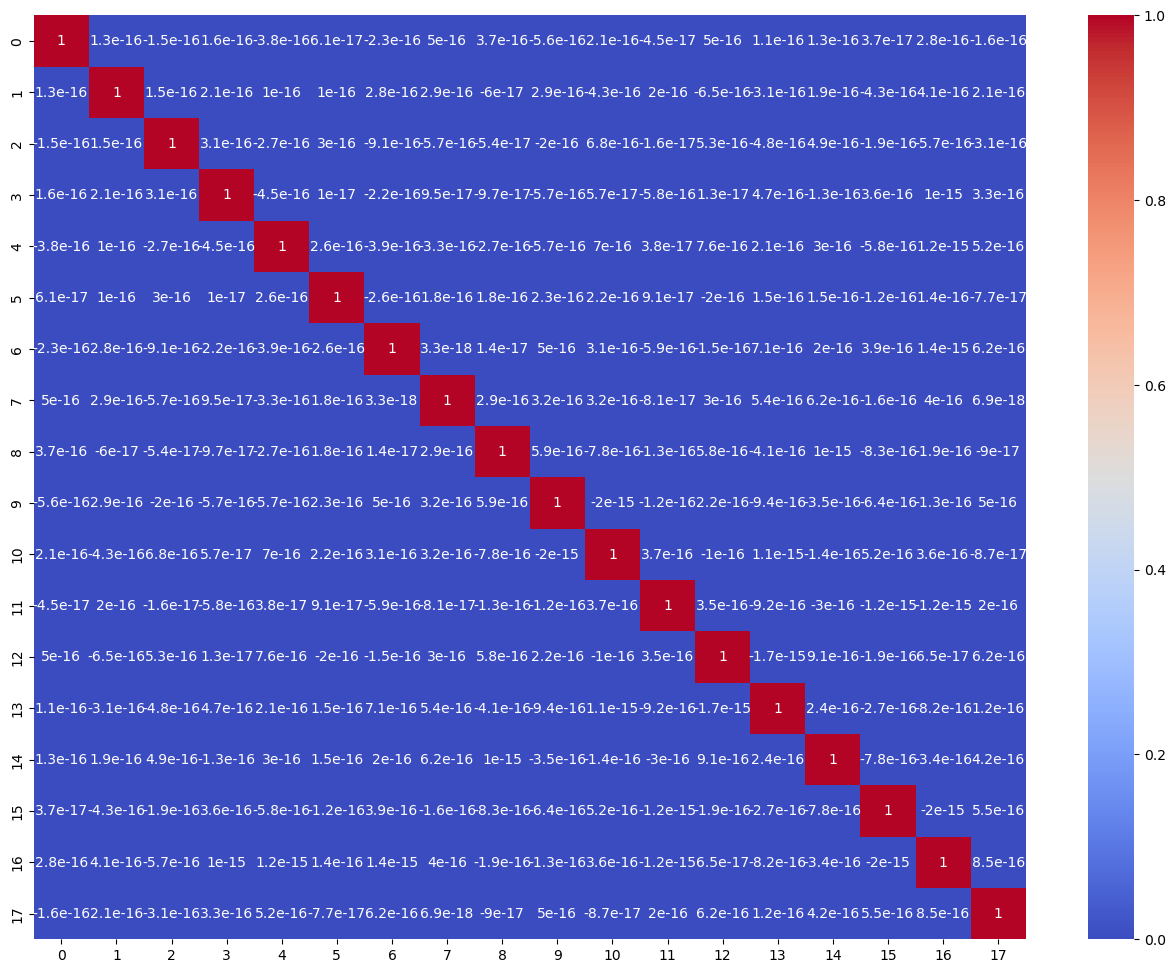

In [304]:
corr = pd.DataFrame(X).corr()
plt.figure(figsize = (16,12))
sns.heatmap(corr,annot = True,cmap = 'coolwarm')
plt.show()

# Intrepretation

- Logistic Regression performs better for this Dataset

# Part 2

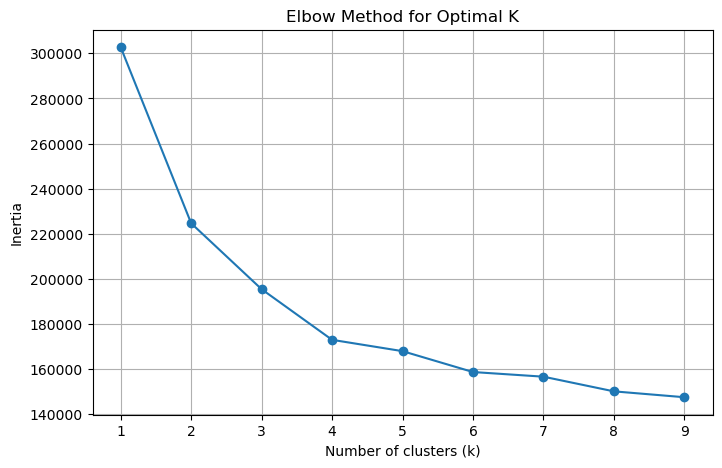

In [309]:
inertia = []
k_range = range(1, 10)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [320]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

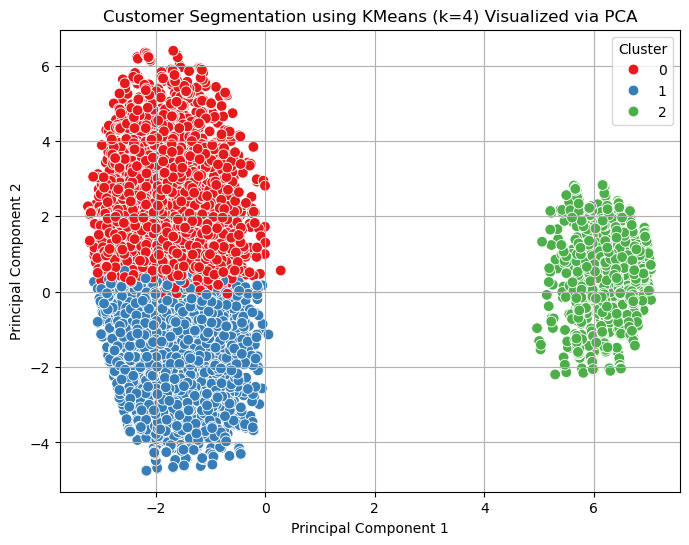

In [322]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette="Set1", s=60)
plt.title("Customer Segmentation using KMeans (k=4) Visualized via PCA")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.grid(True)
plt.show()

In [332]:
ari = adjusted_rand_score(y[0], clusters)
print(f"Adjusted Rand Index (ARI) comparing KMeans clusters with actual churn: {ari:.2f}")

# Combine labels for a comparison table
comparison_df = pd.DataFrame({
    'Actual_Churn': y[0].values,
    'Cluster': clusters
})

print(comparison_df.groupby(['Cluster', 'Actual_Churn']).size().unstack().fillna(0))

Adjusted Rand Index (ARI) comparing KMeans clusters with actual churn: 0.03
Actual_Churn     0     1
Cluster                 
0             2050   345
1             1711  1411
2             1413   113


**In summary, the KMeans clustering was not effective in separating customers based on their churn behavior. The clusters do not strongly correspond to whether customers actually churned or not, as indicated by the low ARI score**